# Midterm 2 - Introduction to Data Science - Spring 2023

## Time Recording Instructions
- The exam is available 4/17/2023 from 7:00AM to 2:00PM EST
- The exam should be completed in a 75-minute interval within the window of availablility
    - For example: 9:30AM to 10:45AM
- Record your start and end times below:
    - Start time: 12:00 pm
    - End time: 1:15 pm
    
## Exam Guidelines
- Answer in the Markdown or code cells given below the questions.
- For open-ended questions, provide enough detail so we can be sure that you understand the concept
- Feel free to use the lecture notes and other resources but work on your own!
- Comment code where appropriate for clarity.
- Use only packages that are loaded with the code in a given problem.
- Do not preprocess data unless instructed.
- Use default parameters of functions unless other parameters are required.



# Part 1 - Iris Flower Classification ( 6 points )

In this problem, we will load a dataset from, https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html,  representing features of iris flowers and class labels as three different types of iris: class 0 = 'setosa',  class 1 = 'versicolor', class 2 = 'virginica'. The code begins by loading the data, plotting a scatterplot, and computing various means, variances, and covariances from the dataset. You do not need to make any modifications to that part. After that, there is a code cell implementing various classification algorithms. There are four assignments for that section. Follow the instructions to add comments and code.

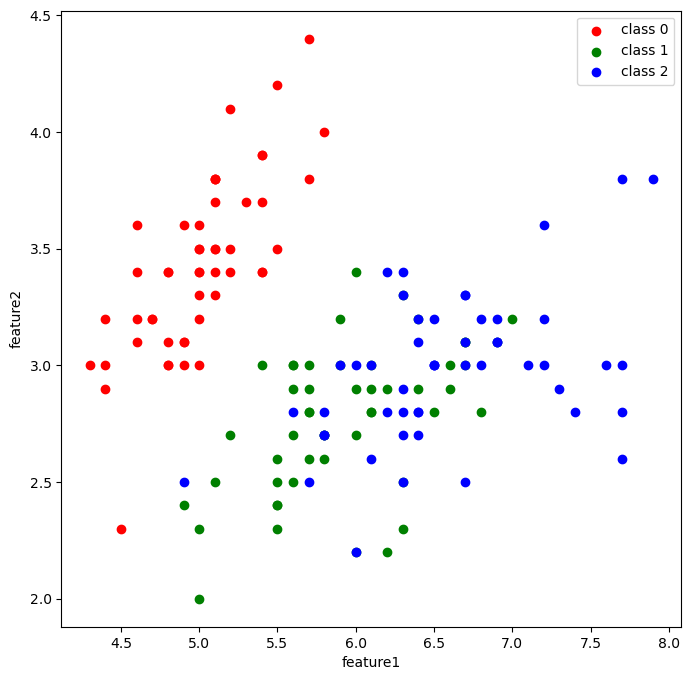

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# load the iris dataset
iris = datasets.load_iris()

# we will use only the first two features
X = iris.data[:,:2]

# there are three possible classes: 0, 1, 2
y = iris.target

# extract the data for each class
X0 = X[np.where(y==0)]
X1 = X[np.where(y==1)]
X2 = X[np.where(y==2)]

# plot a scatterplot of the dataset using different colors for the different classes
plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
plt.scatter(X0[:,0], X0[:,1], c='r', label='class 0')
plt.scatter(X1[:,0], X1[:,1], c='g', label='class 1')
plt.scatter(X2[:,0], X2[:,1], c='b', label='class 2')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend(['class 0', 'class 1', 'class 2'])


In [2]:
# compute the means for each class
mu0, mu1, mu2 = np.mean(X0, axis=0), np.mean(X1, axis=0), np.mean(X2, axis=0)

print("mean for class 0: ")
print(mu0)
print()

print("mean for class 1: ")
print(mu1)
print()

print("mean for class 2: ")
print(mu2)
print()


mean for class 0: 
[5.006 3.428]

mean for class 1: 
[5.936 2.77 ]

mean for class 2: 
[6.588 2.974]



In [3]:


# compute the variances for each class
var0, var1, var2 = np.var(X0, axis=0), np.var(X1, axis=0), np.var(X2, axis=0)

print("variance for class 0: ")
print(var0)
print()

print("variance for class 1: ")
print(var1)
print()

print("variance for class 2: ")
print(var2)
print()



variance for class 0: 
[0.121764 0.140816]

variance for class 1: 
[0.261104 0.0965  ]

variance for class 2: 
[0.396256 0.101924]



In [4]:


# compute the covariances for each class
C0, C1, C2 = np.cov(X0.T), np.cov(X1.T), np.cov(X2.T)
C = np.cov(X.T)


# covariance for class 0
print("covariance for class 0:")
print(C0)
print()

# covariance for class 1
print("covariance for class 1:")
print(C1)
print()

# covariance for class 2
print("covariance for class 2:")
print(C2)
print()

# covariance for full dataset
print("covariance for full dataset:")
print(C)
print()





covariance for class 0:
[[0.12424898 0.09921633]
 [0.09921633 0.1436898 ]]

covariance for class 1:
[[0.26643265 0.08518367]
 [0.08518367 0.09846939]]

covariance for class 2:
[[0.40434286 0.09376327]
 [0.09376327 0.10400408]]

covariance for full dataset:
[[ 0.68569351 -0.042434  ]
 [-0.042434    0.18997942]]



#### A data scientist has written some code below to implement three different classification methods

1. [1pt] Run the following code
2. [1pt] Where indicated, insert a comment explaining the intention of the following code
2. [2pt] Where indicated, name the classification method being used
3. [2pt] Where indicated, complete the code for the Gaussian Naive Bayes classifier

NOTE: All packages you need have already been imported. Do not import any additional packages

In [21]:

# calculate prior probabilities from class proportions.
prior = [np.sum(y==i)/y.shape[0] for i in range(3)]

# Method 1: LDA
def predict_method1(X):
    log_posterior_0 = np.log(prior[0]) - (1/2)*np.log(np.linalg.det(C)) - (1/2)*np.sum((X - mu0) @ np.linalg.inv(C) @ (X - mu0).T, axis=1)
    log_posterior_1 = np.log(prior[1]) - (1/2)*np.log(np.linalg.det(C)) - (1/2)*np.sum((X - mu1) @ np.linalg.inv(C) @ (X - mu1).T, axis=1)
    log_posterior_2 = np.log(prior[2]) - (1/2)*np.log(np.linalg.det(C)) - (1/2)*np.sum((X - mu2) @ np.linalg.inv(C) @ (X - mu2).T, axis=1)
    return np.argmax(np.vstack((log_posterior_0, log_posterior_1, log_posterior_2)), axis=0)

# Method 2: QDA
def predict_method2(X):
    log_posterior_0 = np.log(prior[0]) - (1/2)*np.log(np.linalg.det(C0)) - (1/2)*np.sum((X - mu0) @ np.linalg.inv(C0) @ (X - mu0).T, axis=1)
    log_posterior_1 = np.log(prior[1]) - (1/2)*np.log(np.linalg.det(C1)) - (1/2)*np.sum((X - mu1) @ np.linalg.inv(C1) @ (X - mu1).T, axis=1)
    log_posterior_2 = np.log(prior[2]) - (1/2)*np.log(np.linalg.det(C2)) - (1/2)*np.sum((X - mu2) @ np.linalg.inv(C2) @ (X - mu2).T, axis=1)
    return np.argmax(np.vstack((log_posterior_0, log_posterior_1, log_posterior_2)), axis=0)

# Method 3: Gaussian Naive Bayes 
def predict_method3(X):
    log_posterior_0 = np.log(prior[0]) - (1/2)*np.log(np.linalg.det(var0)) - (1/2)*np.sum((X - mu0) @ np.linalg.inv(var0) @ (X - mu0).T, axis=1) # <REPLACE THIS WITH THE CORRECT FORMULA>
    log_posterior_1 = np.log(prior[1]) - (1/2)*np.log(np.linalg.det(var1)) - (1/2)*np.sum((X - mu0) @ np.linalg.inv(var1) @ (X - mu0).T, axis=1) # <REPLACE THIS WITH THE CORRECT FORMULA>
    log_posterior_2 = np.log(prior[2]) - (1/2)*np.log(np.linalg.det(var2)) - (1/2)*np.sum((X - mu0) @ np.linalg.inv(var2) @ (X - mu0).T, axis=1) # <REPLACE THIS WITH THE CORRECT FORMULA>
    return np.argmax(np.vstack((log_posterior_0, log_posterior_1, log_posterior_2)), axis=0)

y_pred1 = predict_method1(X)
print(np.sum(y_pred1 == y) / len(y))

y_pred2 = predict_method2(X)
print(np.sum(y_pred2 == y) / len(y))

y_pred3 = predict_method3(X)
print(np.sum(y_pred3 == y) / len(y))

0.76
0.7133333333333334
0.3333333333333333


# Part 2 - Water Potability Classification (6 points)

In this problem, we will load a dataset from, https://www.kaggle.com/datasets/adityakadiwal/water-potability, representing features of water (PH, Hardness, Solids, Sulfates, etc) and two class labels: class 0 = not potable (not safe to drink), class 1 = potable (safe to drink). The code begins by loading the data, applying a standard scaler (subract mean, divide by standard deviation). You do not need to modify this part. Then, there is some code that attempts to implement k nearest neighbor classification and random forest classification using built-in sklearn modules. The code also attempts to sweep a range of model hyperparametrers (k for kNN, n_estimators for random forests) and plot the mean 3-fold cross validation accuracy as a function of hyper parameter value. However, there are some mistakes and missing pieces in the code. Follow the instructions and where indicated, add code, correct the code, or provide explanations about the trends in the plots. 

Note: If there is a mistake, the instructions will explicitly say so and ask you to find it. 

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

water = pd.read_csv('water.csv')
water = water.dropna()
X = water.drop(['Potability'],axis=1)
y = water['Potability']
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 2.1 KNN Classifier

[2pt] Implement a k nearest neighbors classifier using the sklearn.neighbors.KNeighborsClassifier. Then, test different values of k and plot the mean 3-fold cross-validation score as a function of k. Where indicated, follow the instructions and complete the code. You do not need to import any additional packages. 

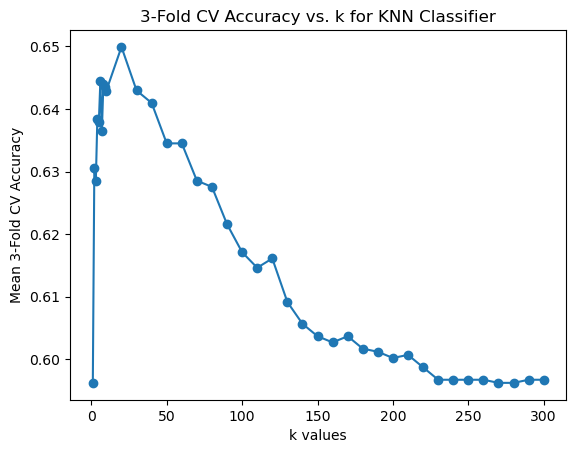

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# range of values to be used for k
k_values = list(range(1, 10)) + list(range(10, 301, 10))

# compute the indices for 3-fold cross validation
#    Note, the "K" in StratifiedKFold is fixed at 3 and unrelated to the "K" in KNeighborsClassifier, 
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=553)

cv_scores = np.zeros(len(k_values))
for i in range(len(k_values)):

    k = k_values[i]
    
    # initialize the sklearn object for the KNN classifier with k neighbors
    #knn = 0 # <REPLACE THIS WITH THE CORRECT CODE>
    knn = KNeighborsClassifier(n_neighbors=k) #answer
    
    # compute the mean cross validation score for the current value of k 
    #cv_scores[i] = 0 # <REPLACE THIS WITH THE CORRECT CODE>
    cv_scores[i] = cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean() #answer
    
plt.plot(k_values, cv_scores, "-o")
plt.xlabel('k values')
plt.ylabel('Mean 3-Fold CV Accuracy')
plt.title('3-Fold CV Accuracy vs. k for KNN Classifier')
plt.show()

### 2.2 Explanation of kNN plot

[1pt] Write a few sentences explaining on the trend you see in the 3-fold cross-validation accuracy of the k nearest neighbor classifier as a function of n_estimators. Why do you think this trend coccurs? Which value of k would you recommend and why?


INSERT YOUR EXPLANATION HERE

Answer: We can see in the figure the with the k increase, the the cross-validation accuracy increases and then drop at about k =30. This is because as k increases, the classifier becomes less flexible and more generalizable to new data, but when it takes too large k the classifier may become too general and over fitting to learn the new data.

### 2.3 Random Forests Classifier

[1pt] The following code attempts to implement a random forest classifier using the sklearn.ensemble.RandomForestClassifier. Then, it tests different values for the number of estimators, keeping the maximum depth at a constant value of 10, and plotting the mean 3-fold cross-validation score as a function of the number of estimators. 

There is a mistake in exactly one line. Find and correct the mistake. Add a new comment explaining what was the mistake and how you changed it.  You do not need to import any additional packages. 



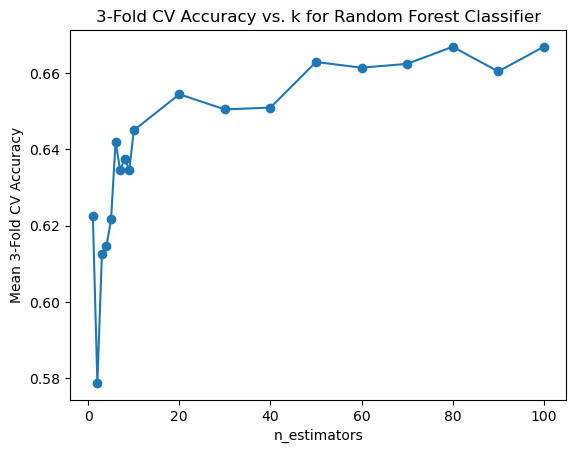

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# range of values to be used for the number of estimators
n_est_values = list(range(1, 10)) + list(range(10, 101, 10))

# compute the indices for 3-fold cross validation
#    Note, the "K" in StratifiedKFold is fixed at 3 and unrelated to the "K" in KNeighborsClassifier, 
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=553)

cv_scores = np.zeros(len(n_est_values))
for i in range(len(n_est_values)):
    n_est = n_est_values[i]
    # initialize the Random Forest classifier with n_est estimators and maximum depth 10
    #rfc = RandomForestClassifier(n_estimators=10, max_depth=n_est)
    rfc = RandomForestClassifier(n_estimators=n_est, max_depth=10) #correction here
    #n_estimators is used to set the number of estimators for the RFC instead of the fixed value of 10
    # compute the mean cross validation score for the current n_est
    cv_scores[i] = np.mean(cross_val_score(rfc, X, y, cv=kf))
    
plt.plot(n_est_values, cv_scores, "-o")
plt.xlabel('n_estimators')
plt.ylabel('Mean 3-Fold CV Accuracy')
plt.title('3-Fold CV Accuracy vs. k for Random Forest Classifier')
plt.show()

### 2.4 Explanation of Random Forests Plot
[1pt] Write a few sentences explaining on the trend you see in the 3-fold cross-validation accuracy of the random forest classifier as a function of n_estimators. Provide an explanation for why this occurs.

INSERT YOUR EXPLANATION HERE

Answer: We can see in the plot that accuracy of the random forest classifier increases with the number of estimators increase. When it come to 20 estimators, it goes to increase little and  slightly. This is because as the number of estimators increases, the random forest model becomes more complex and can perform better. But when the estimator increase to enough number, still increasing the number of estimators can lead to overfitting and decreased performance.

# Part 3 - Clustering the Moons Dataset (7 points)

In this problem, we will load a dataset from, https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html. The code begins by loading the data and plotting a scatterplot. You do not need to make any modifications to that part. After that, there is one code cell implementing a data preprocessing algorithm (manual, no sklearn packages) and another code cell implementing k-means clustering (with sklearn packages). You will be asked to identify the name of the method being applied. You will also be asked to add comments explaining the intent of the code, identify and correct a mistake, and write some code for the k-means clustering algorithm using sklearn. 

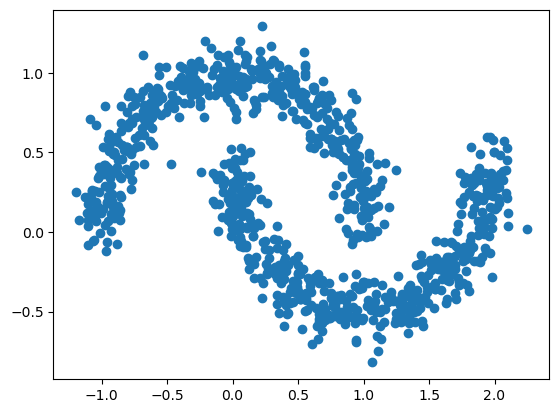

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

noisy_moons = datasets.make_moons(n_samples=1000, noise=0.10, random_state=553)
data = noisy_moons[0]
labels = noisy_moons[1]

plt.figure()
plt.scatter(data[:,0], data[:,1])


### Part 3.1 (4 points)

1. [1pt] Where, indicated, name the pre-processing method
1. [2pt] Where indicated, add a comment explaining the intent of the following code
2. [1pt] Find the error in one step and correct it, add another comment about your correction


In [2]:
# <INSERT THE NAME OF METHOD HERE>
# Spectral clustering

# <INSERT COMMENT HERE EXPLAINING THE FOLLOWING CODE>
# Form distance matrix.
data1 = data[np.newaxis, :, :] 
data2 = data[:, np.newaxis, :] 
temp = data1 - data2
distances = np.sum(temp*temp, axis=2) 

# Form weights adjacency matrix
W1 = (distances <= .1)
W = W1 * (1 - distances/.1)
#np.fill_diagonal(W1, False) 
#W = W1.astype(np.float64)

# <INSERT COMMENT HERE EXPLAINING THE FOLLOWING CODE>
# calculate the degree of each point then Form Laplacian matrix.
d = np.sum(W,0)
D = np.diag(d)

# <INSERT COMMENT HERE EXPLAINING THE FOLLOWING CODE>
# Form Laplacian matrix.
#L = D + W
L = D - W #correction here, wrong way to calculate the Laplacian matrix

# <INSERT COMMENT HERE EXPLAINING THE FOLLOWING CODE>
#calculate the eigenvalues and eigenvectors of the laplacian
S, E = np.linalg.eigh(L)

# take the 2nd and 3rd smallest eigenvalues as the new dataset
new_data = E[:,1:3]

### Part 3.2 (3 points)

1. [3pt] Use sklearn.cluster.KMeans to cluster the data. Assume there are two clusters.


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


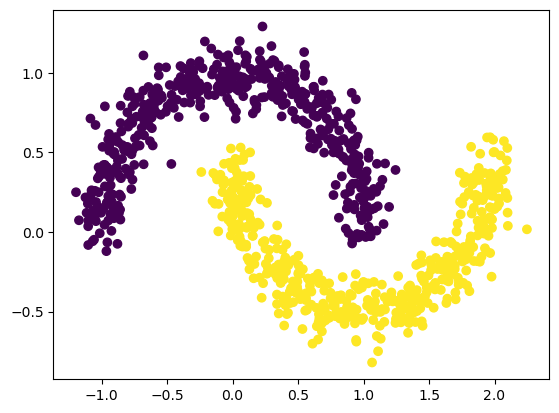

In [4]:

# this is a placeholder value. you should overwrite this with your code
#clusters = np.zeros(data.shape[0])
thresh = 0
ind = 1
clusters = (E[:,ind] < thresh).astype(int)

# import the module for k means clustering
from sklearn.cluster import KMeans

# cluster the data using k means
# clusters = 
kmeans = KMeans(n_clusters=2, random_state=553)
clusters = kmeans.fit_predict(new_data)

# plot as a scatter plot with colors for each cluster
plt.figure()
plt.scatter(data[:,0], data[:, 1], c = clusters)
plt.show()
